# Machine Learning on MCU - Ex3.1
In this exercise we will do hand-written digits recognition.

# Loading an example dataset

In [3]:
from sklearn import datasets
import matplotlib.pyplot as plt

digits = datasets.load_digits()

A dataset is a dictionary-like object that holds all the data and some metadata about the data. This data is stored in the .data member, which is a n_samples, n_features array. In the case of supervised problem, one or more response variables are stored in the .target member. 

For instance, in the case of the digits dataset, digits.data gives access to the features that can be used to classify the digits samples:

In [4]:
print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


and digits.target gives the ground truth for the digit dataset, that is the number corresponding to each digit image that we are trying to learn:

In [5]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

The data is always a 2D array, shape (n_samples, n_features), although the original data may have had a different shape. In the case of the digits, each original sample is an image of shape (8, 8) and can be accessed using:

In [6]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

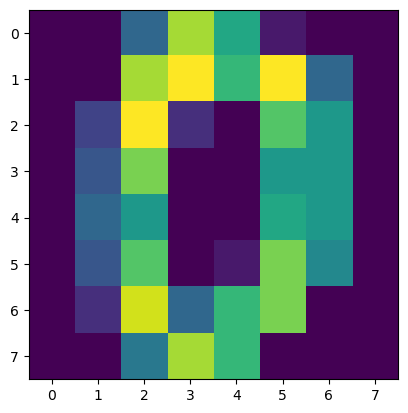

In [7]:
plt.imshow(digits.images[0])

# Prepare the training and test sets

The purpose of this exercise is to get familiar with the scikit-learn library and do a basic training on the hand-written digits dataset. In exercise 2 we will investigate more into model selection (validation).

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
print("The dataset contains in total {} samples.".format(len(digits.target)))

The dataset contains in total 1797 samples.


We split randomly the dataset into 80% training set and 20% test set.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.2, random_state = 0)

In [11]:
print("We have {} training samples and {} test samples".format(len(y_train), len(y_test)))

We have 1437 training samples and 360 test samples


# Learning and predicting

In the case of the digits dataset, the task is to predict, given an image, which digit it represents. We are given samples of each of the 10 possible classes (the digits zero through nine) on which we fit an estimator to be able to predict the classes to which unseen samples belong.

In scikit-learn, an estimator for classification is a Python object that implements the methods fit(X, y) and predict(T)

An example of an estimator is the class sklearn.svm.SVC, which implements support vector classification. The estimator’s constructor takes as arguments the model’s parameters.

For now, we will consider the estimator as a black box:

In [12]:
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.)

Choosing the parameters of the model

In this example, we set the value of gamma manually. To find good values for these parameters, we can use tools such as grid search and cross validation. (See exercise 2)

The clf (for classifier) estimator instance is first fitted to the model; that is, it must learn from the model. This is done by passing our training set to the fit method. We train the model by calling fit method:

In [13]:
clf.fit(X_train, y_train)  

SVC(C=100.0, gamma=0.001)

Now you can predict new values.

In [14]:
y_pred = clf.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score
test_acc = accuracy_score(y_test, y_pred, normalize=True)
n_correct = accuracy_score(y_test, y_pred, normalize=False)
print("Number of correctly classified samples is {}, total number of samples is {}.".format(n_correct, len(y_test)))
print("The test accuracy, defined as number of correctly classified samples over total number of test samples, is {:.2f}%".format(test_acc*100))

Number of correctly classified samples is 357, total number of samples is 360.
The test accuracy, defined as number of correctly classified samples over total number of test samples, is 99.17%


As you have seen in the lecture, the accuracy doesn't distinguish between different types of errors. A better metric would be the confusion matrix. Let's calculate the confusion matrix for this example:

In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 35,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 36,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 30,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 39,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 44,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 39,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 38,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 40]], dtype=int64)

To have a better visualization, we plot the confusion matrix:

Confusion matrix, without normalization
[[27  0  0  0  0  0  0  0  0  0]
 [ 0 35  0  0  0  0  0  0  0  0]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0  0  0]
 [ 0  0  0  0 30  0  0  0  0  0]
 [ 0  0  0  0  0 39  0  0  0  1]
 [ 0  0  0  0  0  0 44  0  0  0]
 [ 0  0  0  0  0  0  0 39  0  0]
 [ 0  1  0  0  0  0  0  0 38  0]
 [ 0  0  0  0  0  1  0  0  0 40]]
Normalized confusion matrix
[[1.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   1.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   1.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.97 0.   0.   0.   0.03]
 [0.   0.   0.   0.   0.   0.   1.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.   0.   0.  ]
 [0.   0.03 0.   0.   0.   0.   0.   0.   0.97 0.  ]
 [0.   0.   0.   0.   0.   0.02 0.   0.   0.   0.98]]


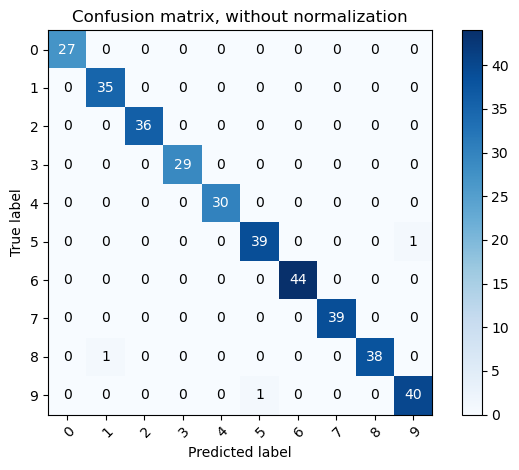

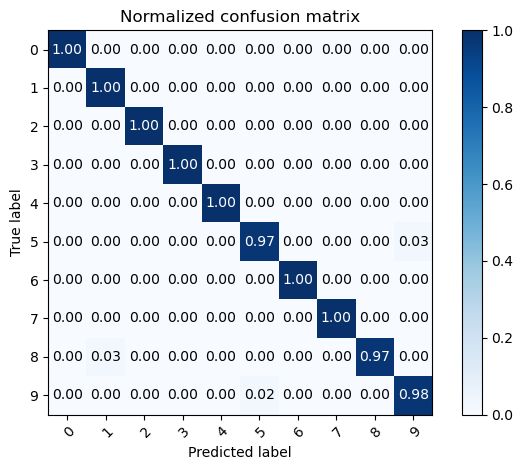

In [17]:
from sklearn.utils.multiclass import unique_labels
import numpy as np

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=digits.target_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=digits.target_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Finally, let's also have a visual check on the last sample:

First we have to resize the array into 8x8 image, to do that we use numpy library, which we already imported previously. (Here you understand how the format of X_train is)

We can see that the shape of the sample data is (1, 64)
Now we have the image shape (8, 8)


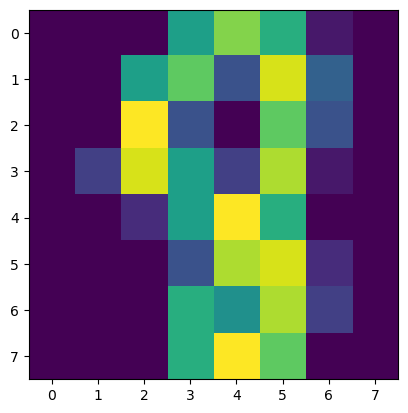

In [18]:
print("We can see that the shape of the sample data is {}".format(X_test[-1:].shape))

# We resize it using numpy resize function:
test_image = np.resize(X_test[-1:], (8,8))
print("Now we have the image shape {}".format(test_image.shape))

# Let's visualize the image:
plt.imshow(test_image)

In [19]:
print("The prediction of the trained model is {}, and the true label is {}".format(y_pred[-1], y_test[-1]))

The prediction of the trained model is 8, and the true label is 8


The trained model managed to predict correctly on this sample data.

As you can see, it is a challenging task: after all, the images are of poor resolution. Do you agree with the classifier?
A complete example of this classification problem is available as an example that you can run and study: https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py

Now let's try with decision tree classifier.

In [29]:
# import the decision tree
from sklearn import tree

# declare the classifier
clf = tree.DecisionTreeClassifier(max_depth=10)

# fit the model
clf.fit(X_train, y_train)

# predict using the trained model
pred = clf.predict(X_test)

# How is the test accuracy?

acc = sum(y_test == pred)/len(pred)
print(acc)

0.8555555555555555
